In [19]:
import numpy as np
import pandas as pd

df = pd.read_csv('hussain-tfidf.csv')

df.drop(df.columns[[0]], axis=1, inplace=True) # Remove the first (junk) column

df[:10] # Only show the first 10 columns

,alternationexpress,arraycompositorimpl,chang,class,client,differ,effici,literalexpress,mani,oper,...,worst,write,xiconwindow,xwindow,xwindowimp,yet,youcreat,youdont,youne,youwant
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,2.442347,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.036882,2.442347,3.4984,2.442347,2.442347,0.0,0.0,0.0,0.0
2,0.0,0.0,2.442347,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.036882,2.442347,3.4984,2.442347,2.442347,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,3.135494,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0


***
#### From Hussain's 2018 paper:

Firstly, to determine the finest weighting
method of each unsupervised learner (in each case study), we
recommend a set of __micro-averaging__ measures (Eqs. (9) and (10)),
namely Precision (P), Recall (R), and F-measure [32,50]. The aim
of these measures is to figure out the best weighting method. For
example, the finest weighting method for an unsupervised learner
is decided on the bases of utmost F-measure value.

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,init='random',n_init='auto').fit(df)

print('===========KMEANS===========')
print('Predicted labels:')
display(km.labels_.tolist())

true_1 = [0]*5 + [1]*7 + [2]*11
true_2 = [0]*5 + [2]*7 + [1]*11
true_3 = [1]*5 + [0]*7 + [2]*11
true_4 = [1]*5 + [2]*7 + [0]*11
true_5 = [2]*5 + [0]*7 + [1]*11
true_6 = [2]*5 + [1]*7 + [0]*11

from sklearn.metrics import f1_score

fscores = [
    f1_score(true_1, km.labels_.tolist(),average='micro'),
    f1_score(true_2, km.labels_.tolist(),average='micro'),
    f1_score(true_3, km.labels_.tolist(),average='micro'),
    f1_score(true_4, km.labels_.tolist(),average='micro'),
    f1_score(true_5, km.labels_.tolist(),average='micro'),
    f1_score(true_6, km.labels_.tolist(),average='micro')
]

km_best = np.around(max(fscores),3)
print('\nBest fscore is:', km_best, 'from true_' + str(np.argmax(fscores) + 1))
display(globals()['true_' + str(np.argmax(fscores) + 1)])

===========KMEANS===========
Predicted labels:


[0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2]


Best fscore is: 0.565 from true_3


[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [21]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3).fit(df)

print('===========AGGLOMERATIVE===========')
print('Predicted labels:')
display(agg.labels_.tolist())

fscores = [
    f1_score(true_1, agg.labels_.tolist(),average='micro'),
    f1_score(true_2, agg.labels_.tolist(),average='micro'),
    f1_score(true_3, agg.labels_.tolist(),average='micro'),
    f1_score(true_4, agg.labels_.tolist(),average='micro'),
    f1_score(true_5, agg.labels_.tolist(),average='micro'),
    f1_score(true_6, agg.labels_.tolist(),average='micro')
]

agg_best = np.around(max(fscores),3)
print('\nBest fscore is:', agg_best, 'from true_' + str(np.argmax(fscores) + 1))
display(globals()['true_' + str(np.argmax(fscores) + 1)])

===========AGGLOMERATIVE===========
Predicted labels:


[1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]


Best fscore is: 0.522 from true_6


[2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
from sklearn_extra.cluster import KMedoids

kmed = KMedoids(n_clusters=3).fit(df)

print('===========PAM-EUCLIDEAN===========')
print('Predicted labels:')
display(kmed.labels_.tolist())

fscores = [
    f1_score(true_1, kmed.labels_.tolist(),average='micro'),
    f1_score(true_2, kmed.labels_.tolist(),average='micro'),
    f1_score(true_3, kmed.labels_.tolist(),average='micro'),
    f1_score(true_4, kmed.labels_.tolist(),average='micro'),
    f1_score(true_5, kmed.labels_.tolist(),average='micro'),
    f1_score(true_6, kmed.labels_.tolist(),average='micro')
]

pam_best = np.around(max(fscores),3)
print('\nBest fscore is:', pam_best, 'from true_' + str(np.argmax(fscores) + 1))
display(globals()['true_' + str(np.argmax(fscores) + 1)])

===========PAM-EUCLIDEAN===========
Predicted labels:


[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1]


Best fscore is: 0.435 from true_1


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [23]:
from sklearn_extra.cluster import KMedoids

kmed_manhattan = KMedoids(n_clusters=3,metric='manhattan').fit(df)

print('===========PAM-MANHATTAN===========')
print('Predicted labels:')
display(kmed_manhattan.labels_.tolist())

fscores = [
    f1_score(true_1, kmed_manhattan.labels_.tolist(),average='micro'),
    f1_score(true_2, kmed_manhattan.labels_.tolist(),average='micro'),
    f1_score(true_3, kmed_manhattan.labels_.tolist(),average='micro'),
    f1_score(true_4, kmed_manhattan.labels_.tolist(),average='micro'),
    f1_score(true_5, kmed_manhattan.labels_.tolist(),average='micro'),
    f1_score(true_6, kmed_manhattan.labels_.tolist(),average='micro')
]

pam_manh_best = np.around(max(fscores),3)
print('\nBest fscore is:', pam_manh_best, 'from true_' + str(np.argmax(fscores) + 1))
display(globals()['true_' + str(np.argmax(fscores) + 1)])

===========PAM-MANHATTAN===========
Predicted labels:


[0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]


Best fscore is: 0.478 from true_4


[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [24]:
# https://towardsdatascience.com/fuzzy-c-means-clustering-with-python-f4908c714081
from fcmeans import FCM

cm = FCM(n_clusters=3)
cm.fit(df.to_numpy())

labels = cm.predict(df.to_numpy()).tolist()

print('===========FUZZY-CMEANS===========')
print('Predicted labels:')
display(labels)

fscores = [
    f1_score(true_1, labels,average='micro'),
    f1_score(true_2, labels,average='micro'),
    f1_score(true_3, labels,average='micro'),
    f1_score(true_4, labels,average='micro'),
    f1_score(true_5, labels,average='micro'),
    f1_score(true_6, labels,average='micro')
]

fcm_best = np.around(max(fscores),3)
print('\nBest fscore is:', fcm_best, 'from true_' + str(np.argmax(fscores) + 1))
display(globals()['true_' + str(np.argmax(fscores) + 1)])

===========FUZZY-CMEANS===========
Predicted labels:


[0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0]


Best fscore is: 0.435 from true_1


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

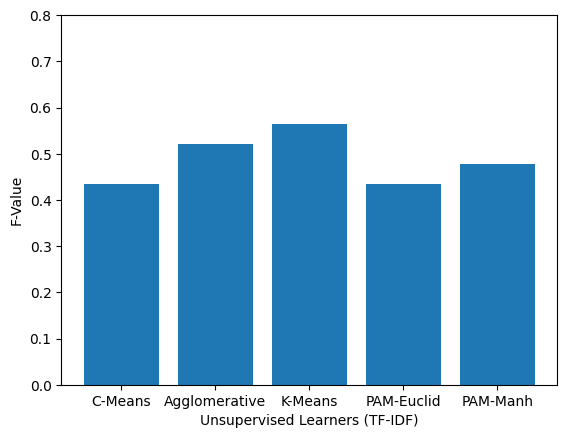

In [26]:
import matplotlib.pyplot as plt

data = [fcm_best, agg_best, km_best, pam_best, pam_manh_best]
labels = ['C-Means', 'Agglomerative', 'K-Means','PAM-Euclid','PAM-Manh']
plt.xticks(range(len(data)), labels)
plt.ylim([0, 0.8])
plt.xlabel('Unsupervised Learners (TF-IDF)')
plt.ylabel('F-Value')
plt.bar(range(len(data)), data) 
plt.show()